In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Problem 1

In [45]:
df = pd.read_csv('faithful.csv')
print("shape", df.shape)
df.head()

shape (272, 3)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [46]:
#df drop first column
df = df.drop(df.columns[0], axis=1)
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


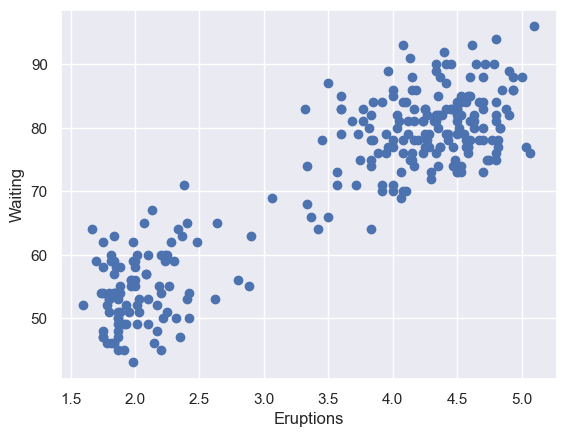

In [47]:
#scatter plot

plt.scatter(df.eruptions, df.waiting)
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.show()

### K-Mean Clustering using Black Box Optimization

[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


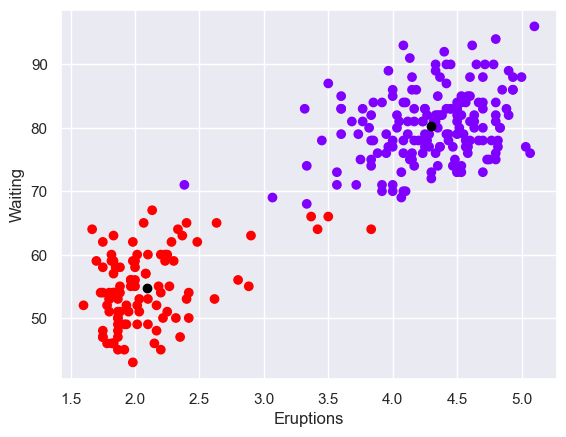

In [48]:
#k-means clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
centroids_blackbox = kmeans.cluster_centers_
print(centroids_blackbox)

#plot
plt.scatter(df.eruptions, df.waiting, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.show()



## K-Means Clustering from Scratch

### K-means Clustering Objective

K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

### Objective Function

The objective of K-means is to find the positions $\mu_1, \mu_2, ..., \mu_k$ of the centers of these clusters and the assignment of each data point to a cluster such that the sum of the squared distances of each point to its closest cluster center is minimized.

The cost function $J$ to be minimized is:

$ J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} \cdot ||x_i - \mu_j||^2 $

where:

- $n$ is the number of data points,
- $k$ is the number of clusters,
- $x_i$ is the $i^{th}$ data point,
- $\mu_j$ is the centroid of the $j^{th}$ cluster,
- $w_{ij}$ is 1 if $x_i$ is assigned to cluster $j$, and 0 otherwise,
- $||x_i - \mu_j||^2$ is the squared Euclidean distance between $x_i$ and $\mu_j$.

### Algorithm

1. **Initialization**: Randomly select $k$ data points as the initial centroids.
2. **Assignment Step**: Assign each data point to the closest centroid.
3. **Update Step**: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat steps 2 and 3 until the centroids no longer change significantly, indicating convergence.



In [49]:


def k_means(X, k, max_iters=100, tol=1e-4):
    n, features = X.shape
    centroids = X[np.random.choice(n, k, replace=False)]
    prev_centroids = centroids.copy()
    distances = np.zeros((n, k))
    labels = np.zeros(n, dtype=int)
    
    for _ in range(max_iters):
        # Assignment step
        for i in range(k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        labels = np.argmin(distances, axis=1)
        
        # Update step
        for i in range(k):
            centroids[i] = np.mean(X[labels == i], axis=0)
        
        # Check for convergence
        if np.linalg.norm(centroids - prev_centroids) < tol:
            break
        prev_centroids = centroids.copy()
    
    return labels, centroids





centroids
 [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


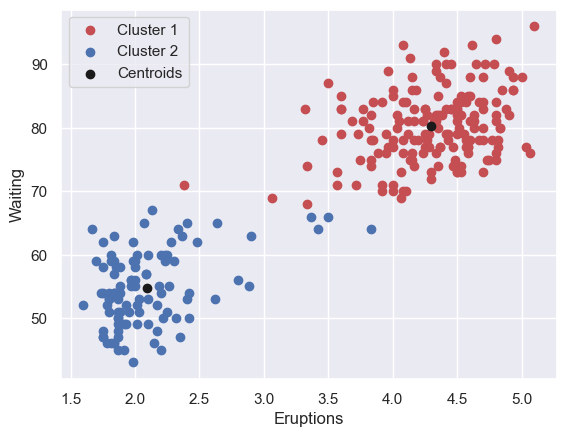

In [50]:
# k=2
X = df.values
labels, centroids_2 = k_means(X, 2)

print("centroids\n", centroids_2)

# Plot the data
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='r', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='b', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', label='Centroids')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.legend()
plt.show()

centroids
 [[ 3.9638     72.70769231]
 [ 4.34997436 83.18803419]
 [ 2.02314444 53.61111111]]


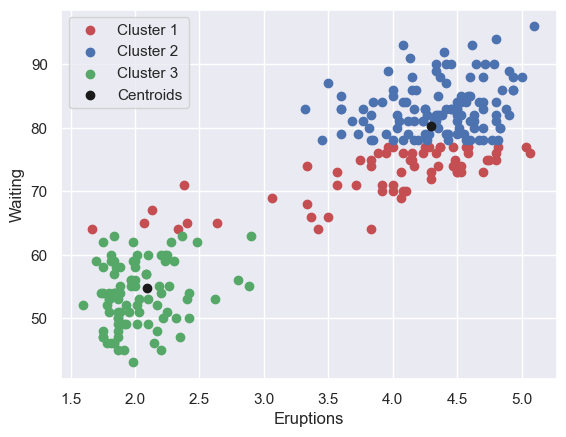

In [51]:
# k=3
X = df.values
labels, centroids_3 = k_means(X, 3)

print("centroids\n", centroids_3)

# Plot the data
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='r', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='b', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], color='g', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', label='Centroids')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.legend()
plt.show()

### Finding optimal K using Elbow Method

The Elbow Method is a heuristic used in determining the number of clusters in a dataset. The method consists of plotting the number of clusters on the x-axis and the WCSS on the y-axis. As the number of clusters increases, the WCSS will tend to decrease; this is because the points will be closer to the centroids they are assigned to.

However, after a certain number of clusters, the decrease in WCSS will start to diminish, forming an "elbow" in the plot. The number of clusters at which this elbow occurs is considered to be the optimal number of clusters. The rationale behind this method is to choose a small value of k that still has a low WCSS, and where increasing k does not provide significantly better modeling of the data.

### WCSS
WCSS stands for Within-Cluster Sum of Square. It is a metric used to evaluate the performance of a K-means clustering algorithm. WCSS measures the sum of squared distances between each point in a cluster and the centroid of that cluster. The idea is to minimize WCSS, which indicates that the clusters are compact and well-separated.

The WCSS for a given number of clusters $k$ is calculated as:

$ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $

where:
- $k$ is the number of clusters,
- $C_i$ is the set of points in the $i^{th}$ cluster,
- $x$ is a point in cluster $C_i$,
- $\mu_i$ is the centroid of the $i^{th}$ cluster,
- $||x - \mu_i||^2$ is the squared Euclidean distance between the point $x$ and the centroid $\mu_i$.



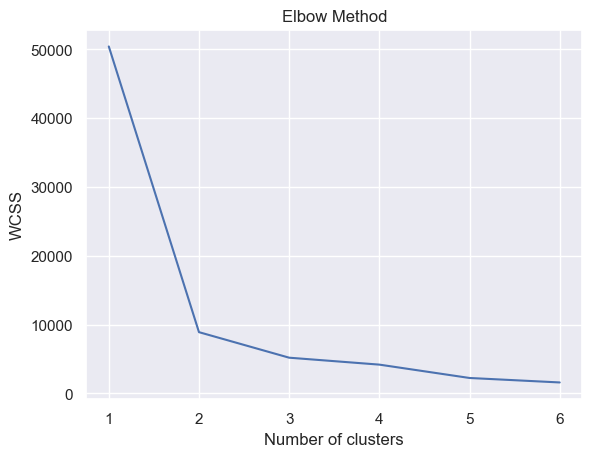

In [52]:
# Elbow method
wcss = []
for i in range(1, 7):
    labels, centroids = k_means(X, i)
    wcss.append(np.sum(np.linalg.norm(X - centroids[labels], axis=1) ** 2))
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the elbow method, the optimal number of clusters are 2. We will use the same for comparing the results of our implementation with the sklearn implementation.

# Problem 2

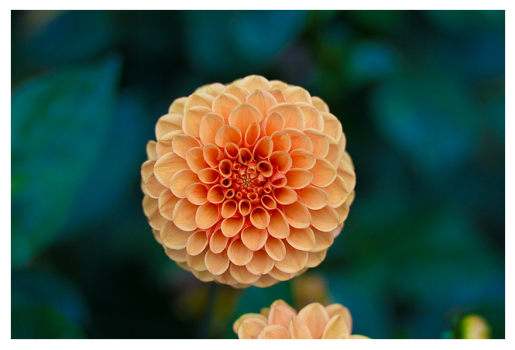

In [53]:
from sklearn.datasets import load_sample_image    # Datasets containing sample images in the scikit-learn library
flower = load_sample_image("flower.jpg")            # Loads a sample image flower.jpg
ax = plt.axes(xticks=[], yticks=[])               # Plot the image
ax.imshow(flower)

In [54]:
flower.shape

(427, 640, 3)

In [55]:
data = flower / 255.0                # Converts RGB intensity to a [0,1] scale
data = data.reshape(427 * 640, 3)   # Reshapes the image
data.shape

(273280, 3)

In [57]:
# Define a plot_pixels function 

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose a random subset of pixels 

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Define the axes and markets on the figure
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

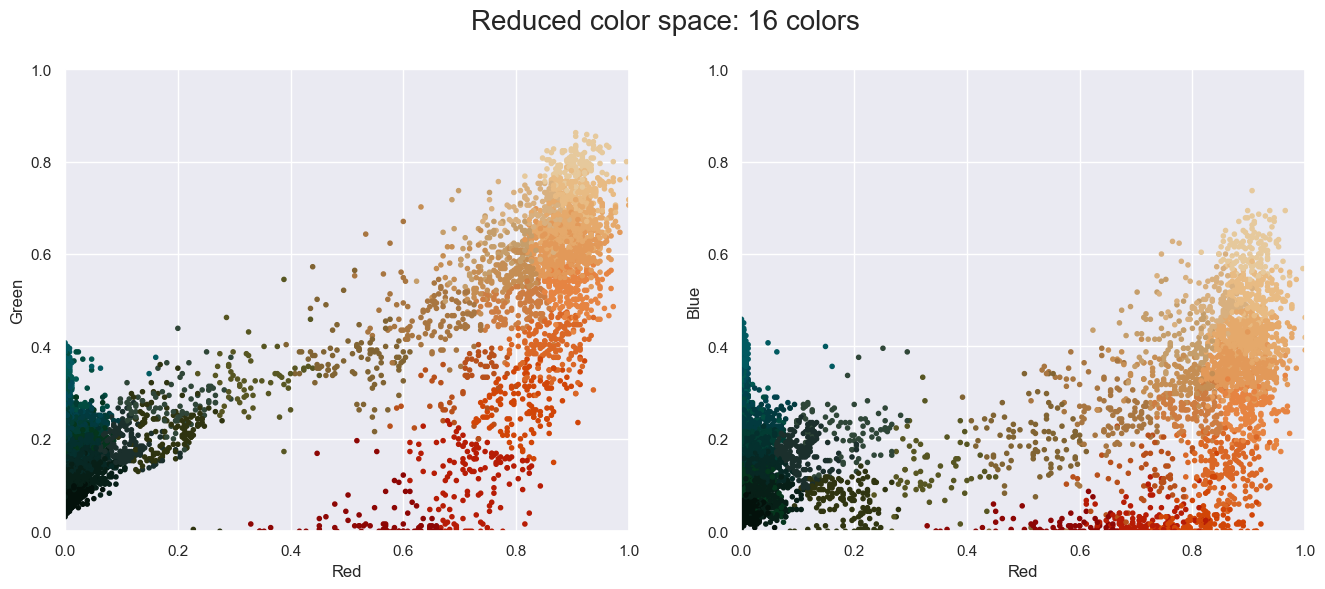

In [58]:
# Import and run the minibatchkmeans function from sklearn

from sklearn.cluster import MiniBatchKMeans

# Perform K-means with K = 16 

kmeans = MiniBatchKMeans(32)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Plot the reduced color space using the 16 colors 

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

Text(0.5, 1.0, '32-color Image')

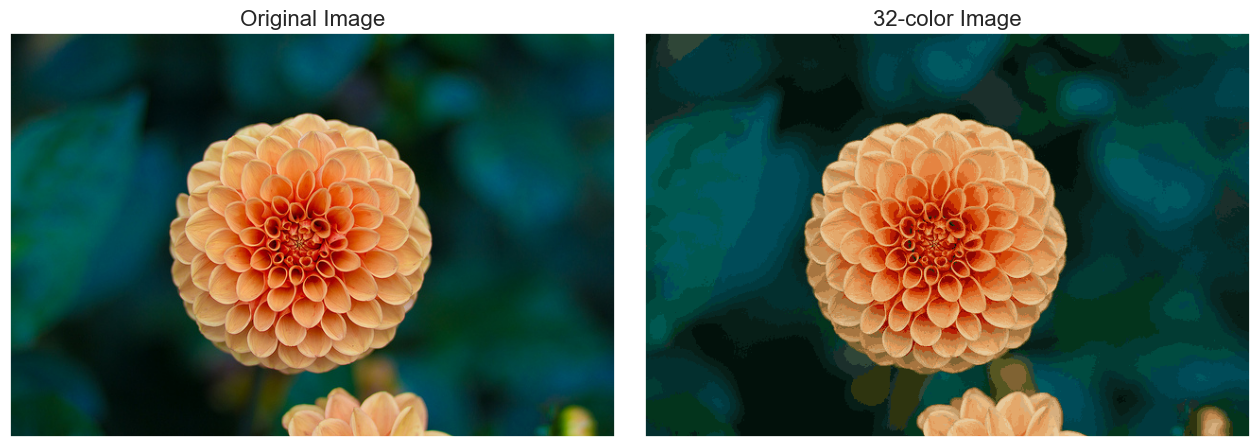

In [59]:
flower_recolored = new_colors.reshape(flower.shape) # Defines the recolored image

# Plots the original image and the recolored image for comparison

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('32-color Image', size=16)